# Capstone Project - Housing Sales Prices & Venues Data Analysis of Casablanca-Morocco
### Applied Data Science Capstone by Saad TOUHAMI EL ALAMI

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Casablanca is a port city on the Atlantic coast of western Morocco. It is Morocco's biggest city, principal port, and economic capital. The town of Casablanca was founded in 1515. It was an important strategic port during World War II and hosted the Anglo-American Summit in 1943. The city is served by Mohammed V International Airport. Casablanca covers the richest and most sophisticated aspects of Morocco life, style, and architecture. Casablanca boasts one of the most extensive and diverse displays of art deco architecture in the world.

At the center of the former 'Great Casablanca' region (currently part of the Casablanca-Settat administrative region), this metropole is considered the locomotive of the development of the Moroccan economy. It attracts 32% of the country's production units and 56% of industrial labor. The region uses 30% of the national electricity production.The region contributes to 44% of the industrial production of the kingdom of Morocco. About 33% of national industrial exports, MAD 27 billion, comes from the Grand Casablanca; 30% of the Moroccan banking network is concentrated in Casablanca.

Based on a recent report released by the World Economic Forum (WEF), Casablanca is amongst the world’s most crowded cities. With a population density of 14,200 inhabitants per square kilometer, Casablanca came fifth in the world and first in Africa.

The idea behind this project is to combine venue data with house sales pricing (apartment per square meter price) and try to analyze, index and cluster the results for better understanding of what could motivate a future home owner in Casablanca in his or her choice of district/neighborhood.

## Data 

In order to answer the main business problem, various data sources were used to collect relevant data, namely:

•	Fourth level administrative divisions of Morocco from the spatial data repository of NYU. The Json file wasn’t available for download, instead we used the shapefile that was converted later to a csv file and cleaned to reflect Boroughs of the region of ‘Great Casablanca’.

•	Foursquare API was used to get the most common venues of boroughs of ‘Great Casablanca’.


•	Per square meter housing average prices of boroughs of Casablanca as published by the Directorate-General for Taxation in Morocco (raw data was cleaned and processed to be integrated in our dataset). Data was wrangled to reflect our need for average per square meter prices of apartments in Casablanca.

## Methodology

In [1]:

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt


# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

!conda install -c conda-forge xlrd --yes

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         238 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0        conda-forge
    geopy:         1.20.0-py_0      conda-forge

The following pac

#### let's start by importing/loading the pre-wrangled dataset that wee will be using in this project

In [2]:
from pandas import read_excel
xl_file=read_excel("Grand_Casablanca.xlsx", sheet_name="Grand_Casablanca")
print(xl_file.head())

   Country          Province        City      Borough  \
0  Morocco  Grand Casablanca  Casablanca    Bouskoura   
1  Morocco  Grand Casablanca  Casablanca    Bouskoura   
2  Morocco  Grand Casablanca  Casablanca     Mediouna   
3  Morocco  Grand Casablanca  Casablanca     Mediouna   
4  Morocco  Grand Casablanca  Casablanca  Ahl Laghlam   

              Neighborhood           Type  longitude   latitude  m_sq_price  
0                Bouskoura  Rural Commune  -7.621141  33.468276       10966  
1              Dar Bouazza  Rural Commune  -7.777721  33.512917       10966  
2  El Majjatia Oulad Taleb  Rural Commune  -7.527317  33.461789        6416  
3              Lahraouyine  Rural Commune  -7.523790  33.532434        6416  
4              Ahl Laghlam  Urban Commune  -7.487686  33.574038        8216  


In [3]:
df=xl_file.drop(['Country','Province','City','Type'], axis =1)
#df=df_data_0.drop(['Country','Province','City','Type'], axis =1)
df.head()

,Borough,Neighborhood,longitude,latitude,m_sq_price
0,Bouskoura,Bouskoura,-7.621141,33.468276,10966
1,Bouskoura,Dar Bouazza,-7.777721,33.512917,10966
2,Mediouna,El Majjatia Oulad Taleb,-7.527317,33.461789,6416
3,Mediouna,Lahraouyine,-7.523790,33.532434,6416
4,Ahl Laghlam,Ahl Laghlam,-7.487686,33.574038,8216


In [4]:
df2=df.drop(['Borough','longitude','latitude'], axis =1)
df2.head()

,Neighborhood,m_sq_price
0,Bouskoura,10966
1,Dar Bouazza,10966
2,El Majjatia Oulad Taleb,6416
3,Lahraouyine,6416
4,Ahl Laghlam,8216


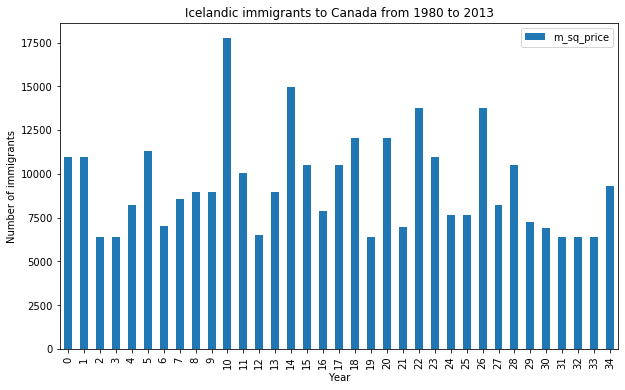

In [5]:
df2.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
Borough         35 non-null object
Neighborhood    35 non-null object
longitude       35 non-null float64
latitude        35 non-null float64
m_sq_price      35 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.5+ KB


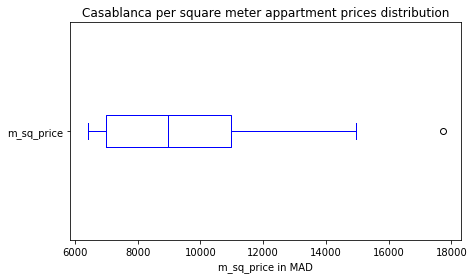

In [7]:
df.m_sq_price.plot(kind='box', figsize=(7, 4),color='blue', vert=False)
#plt.boxplot(df.m_sq_price)
plt.title('Casablanca per square meter appartment prices distribution')
plt.xlabel('m_sq_price in MAD')
plt.show()

In [8]:
df.m_sq_price.describe()

count       35.000000
mean      9358.485714
std       2793.313301
min       6416.000000
25%       6979.000000
50%       8954.000000
75%      10966.000000
max      17738.000000
Name: m_sq_price, dtype: float64

#### let's get Casablanca's coordinates and map it on folium

In [9]:
from geopy.geocoders import Nominatim
address = 'Casablanca, Morocco '

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Casablanca are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Casablanca are 33.5950627, -7.6187768.


In [15]:
import folium
map_casablanca = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['latitude'], df['longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_casablanca)  
    
map_casablanca

In [11]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df['m_sq_price'].min(),
                              df['m_sq_price'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

casablanca = r'Casablanca_2.json' 

In [54]:
map_casablanca_2 = folium.Map(location=[latitude, longitude],tiles='Stamen Toner', zoom_start=12)
map_casablanca_2.choropleth(
    geo_data=casablanca,
    data=df,
    columns=['Neighborhood', 'm_sq_price'],
    key_on='feature.geometry.name',
    threshold_scale=threshold_scale,
   fill_color='YlGn',
    #fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Casablanca'
)

# display map
map_casablanca_2

#### Let's use Foursquare API to get Venue data on Casablanca

In [16]:
CLIENT_ID = '0XW2IWTTWXBKARBDZDA0H5XQDP0DFAR3KNAZ5JTKCVEYH0P3' # your Foursquare ID
CLIENT_SECRET = '0F5RSJBFQBOFTSNCE5KSPZEFA0QXAXHNVHCR5JHENQO4PYZQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0XW2IWTTWXBKARBDZDA0H5XQDP0DFAR3KNAZ5JTKCVEYH0P3
CLIENT_SECRET:0F5RSJBFQBOFTSNCE5KSPZEFA0QXAXHNVHCR5JHENQO4PYZQ


let's explore one of the neighborhoods in Casablanca

In [17]:
neighborhood_latitude = df.loc[10, 'latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[10, 'longitude'] # neighborhood longitude value

neighborhood_name =df.loc[10, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Anfa are 33.5886101954347, -7.6615514286113395.


Now, let's get the top 100 venues that are in Anfa Neighborhood within a radius of 1500 meters.

In [18]:
LIMIT = 100
radius = 1500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=0XW2IWTTWXBKARBDZDA0H5XQDP0DFAR3KNAZ5JTKCVEYH0P3&client_secret=0F5RSJBFQBOFTSNCE5KSPZEFA0QXAXHNVHCR5JHENQO4PYZQ&v=20180605&ll=33.5886101954347,-7.6615514286113395&radius=1500&limit=100'

In [19]:
results = requests.get(url).json()

In [20]:
 #function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Royal Golf D'Anfa,Golf Course,33.588384,-7.658432
1,Starbucks,Coffee Shop,33.589764,-7.649899
2,Om Yoga,Yoga Studio,33.593753,-7.668892
3,Roosevelt Café,Café,33.594718,-7.667885
4,Frédéric Cassel,Café,33.589944,-7.650890


In [24]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

65 venues were returned by Foursquare.


In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


casablanca_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

Bouskoura
Dar Bouazza
El Majjatia Oulad Taleb
Lahraouyine
Ahl Laghlam
Ain Chock
Ain Harrouda
Ain Sebaa
Al Fida
Al Idrissia
Anfa
Roches-Noires
Ben Msick
Bou Chentouf
El Maarif
Hay Hassani
Hay Mohammadi
Lissasfa
Machouar Casablanca
Mediouna
Mers Sultan
Moulay Rachid
Moulay Youssef
Nouaceur
Salmia
Sbata
Sidi Belyout
Sidi Bernoussi
Sidi Maarouf
Sidi Moumen
Sidi Othmane
Tit Mellil
Echchallalate
Sidi Hajjaj Ouad Hassar
Mohammedia


In [27]:
print(casablanca_venues.shape)
casablanca_venues.head()

(109, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ain Chock,33.529698,-7.609077,Horizon California,33.528067,-7.612827,Café
1,Ain Chock,33.529698,-7.609077,Pharmacie Les Anges,33.533525,-7.608327,Pharmacy
2,Ain Chock,33.529698,-7.609077,Cafe 7even,33.533360,-7.606924,Beer Garden
3,Ain Chock,33.529698,-7.609077,Salle Imane,33.533775,-7.609749,Gym
4,Ain Chock,33.529698,-7.609077,Segafredo Bv al Qods,33.533761,-7.606956,Café


In [28]:
casablanca_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ain Chock,5,5,5,5,5,5
Ain Sebaa,2,2,2,2,2,2
Al Fida,5,5,5,5,5,5
Al Idrissia,3,3,3,3,3,3
Anfa,4,4,4,4,4,4
Ben Msick,4,4,4,4,4,4
Bou Chentouf,4,4,4,4,4,4
El Maarif,3,3,3,3,3,3
Hay Hassani,1,1,1,1,1,1


In [29]:
print('There are {} uniques categories.'.format(len(casablanca_venues['Venue Category'].unique())))

There are 55 uniques categories.


In [42]:
# one hot encoding
casablanca_onehot = pd.get_dummies(casablanca_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
casablanca_onehot['Neighborhood'] = casablanca_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [casablanca_onehot.columns[-1]] + list(casablanca_onehot.columns[:-1])
casablanca_onehot = casablanca_onehot[fixed_columns]

casablanca_onehot.head()

,Neighborhood,Airport Service,Airport Terminal,Art Gallery,Bar,Beer Garden,Burrito Place,Café,Coffee Shop,Concert Hall,Creperie,Department Store,Dessert Shop,Diner,Doner Restaurant,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,Frozen Yogurt Shop,Go Kart Track,Golf Course,Grocery Store,Gym,Hotel,Indie Movie Theater,Italian Restaurant,Jewelry Store,Juice Bar,Mediterranean Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Movie Theater,Pharmacy,Pizza Place,Playground,Plaza,Pool Hall,Pub,Public Art,Racetrack,Resort,Restaurant,Sandwich Place,Shopping Mall,Snack Place,Soccer Field,Spa,Spanish Restaurant,Sports Club,Steakhouse,Supermarket,Taco Place,Train Station,Tram Station
0,Ain Chock,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ain Chock,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ain Chock,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ain Chock,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ain Chock,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
casablanca_onehot.shape

(109, 56)

In [44]:
casablanca_grouped = casablanca_onehot.groupby('Neighborhood').mean().reset_index()
casablanca_grouped

,Neighborhood,Airport Service,Airport Terminal,Art Gallery,Bar,Beer Garden,Burrito Place,Café,Coffee Shop,Concert Hall,Creperie,Department Store,Dessert Shop,Diner,Doner Restaurant,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,Frozen Yogurt Shop,Go Kart Track,Golf Course,Grocery Store,Gym,Hotel,Indie Movie Theater,Italian Restaurant,Jewelry Store,Juice Bar,Mediterranean Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Movie Theater,Pharmacy,Pizza Place,Playground,Plaza,Pool Hall,Pub,Public Art,Racetrack,Resort,Restaurant,Sandwich Place,Shopping Mall,Snack Place,Soccer Field,Spa,Spanish Restaurant,Sports Club,Steakhouse,Supermarket,Taco Place,Train Station,Tram Station
0,Ain Chock,0.0,0.0,0.00,0.000000,0.2,0.0,0.400000,0.000,0.00,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.000000,0.00,0.000000,0.0,0.000000,0.00,0.00,0.2,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.2,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0000,0.000,0.000000
1,Ain Sebaa,0.0,0.0,0.00,0.000000,0.0,0.5,0.000000,0.000,0.00,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.500000,0.00,0.000000,0.0,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0000,0.000,0.000000
2,Al Fida,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000,0.00,0.0000,0.2,0.0,0.000000,0.000000,0.0,0.0000,0.200000,0.00,0.000000,0.0,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0000,0.0,0.2,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.000,0.2,0.000000,0.000000,0.00,0.0,0.2,0.0000,0.000,0.000000
3,Al Idrissia,0.0,0.0,0.00,0.000000,0.0,0.0,1.000000,0.000,0.00,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.000000,0.00,0.000000,0.0,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0000,0.000,0.000000
4,Anfa,0.0,0.0,0.25,0.000000,0.0,0.0,0.000000,0.000,0.25,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.000000,0.00,0.000000,0.0,0.000000,0.25,0.00,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.0,0.00,0.000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0000,0.000,0.000000
5,Ben Msick,0.0,0.0,0.00,0.000000,0.0,0.0,0.250000,0.500,0.00,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.000000,0.00,0.000000,0.0,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.2500,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0000,0.000,0.000000
6,Bou Chentouf,0.0,0.0,0.00,0.000000,0.0,0.0,0.750000,0.000,0.00,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.250000,0.00,0.000000,0.0,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0000,0.000,0.000000
7,El Maarif,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000,0.00,0.0000,0.0,0.0,0.333333,0.000000,0.0,0.0000,0.000000,0.00,0.000000,0.0,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.333333,0.00,0.000000,0.000000,0.0,0.00,0.000,0.0,0.333333,0.000000,0.00,0.0,0.0,0.0000,0.000,0.000000
8,Hay Hassani,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000,0.00,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.000000,0.00,0.000000,0.0,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,1.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.

In [45]:
casablanca_grouped.shape

(22, 56)

In [46]:
num_top_venues = 5

for hood in casablanca_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = casablanca_grouped[casablanca_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ain Chock----
             venue  freq
0             Café   0.4
1      Beer Garden   0.2
2         Pharmacy   0.2
3              Gym   0.2
4  Airport Service   0.0


----Ain Sebaa----
                  venue  freq
0         Burrito Place   0.5
1  Fast Food Restaurant   0.5
2       Airport Service   0.0
3                Resort   0.0
4   Moroccan Restaurant   0.0


----Al Fida----
                  venue  freq
0             Juice Bar   0.2
1  Fast Food Restaurant   0.2
2           Supermarket   0.2
3          Soccer Field   0.2
4      Department Store   0.2


----Al Idrissia----
                       venue  freq
0                       Café   1.0
1            Airport Service   0.0
2                     Resort   0.0
3  Middle Eastern Restaurant   0.0
4        Moroccan Restaurant   0.0


----Anfa----
             venue  freq
0      Art Gallery  0.25
1     Concert Hall  0.25
2      Golf Course  0.25
3        Racetrack  0.25
4  Airport Service  0.00


----Ben Msick----
             venu

In [47]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighborhood'] = casablanca_grouped['Neighborhood']

for ind in np.arange(casablanca_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(casablanca_grouped.iloc[ind, :], num_top_venues)
neighbourhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Ain Chock,Café,Gym,Beer Garden,Pharmacy,Tram Station
1,Ain Sebaa,Burrito Place,Fast Food Restaurant,Tram Station,Doner Restaurant,Hotel
2,Al Fida,Supermarket,Juice Bar,Soccer Field,Fast Food Restaurant,Department Store
3,Al Idrissia,Café,Tram Station,Doner Restaurant,Hotel,Gym
4,Anfa,Racetrack,Art Gallery,Golf Course,Concert Hall,Doner Restaurant


In [48]:
# set number of clusters
kclusters = 3

casablanca_grouped_clustering = casablanca_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(casablanca_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 1, 2, 1, 1, 2, 1, 1, 1], dtype=int32)

In [49]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

casablanca_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
casablanca_merged = casablanca_merged.join(neighbourhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
casablanca_merged['Cluster Labels'].fillna(0, inplace=True)
casablanca_merged["Cluster Labels"] = casablanca_merged["Cluster Labels"].apply(np.int32)
casablanca_merged.head()

,Borough,Neighborhood,longitude,latitude,m_sq_price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bouskoura,Bouskoura,-7.621141,33.468276,10966,0,NaN,NaN,NaN,NaN,NaN
1,Bouskoura,Dar Bouazza,-7.777721,33.512917,10966,0,NaN,NaN,NaN,NaN,NaN
2,Mediouna,El Majjatia Oulad Taleb,-7.527317,33.461789,6416,0,NaN,NaN,NaN,NaN,NaN
3,Mediouna,Lahraouyine,-7.523790,33.532434,6416,0,NaN,NaN,NaN,NaN,NaN
4,Ahl Laghlam,Ahl Laghlam,-7.487686,33.574038,8216,0,NaN,NaN,NaN,NaN,NaN


In [50]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(casablanca_merged['latitude'], casablanca_merged['longitude'], casablanca_merged['Neighborhood'], casablanca_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [51]:
casablanca_merged.loc[casablanca_merged['Cluster Labels'] == 0, casablanca_merged.columns[[1] + list(range(5, casablanca_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bouskoura,0,NaN,NaN,NaN,NaN,NaN
1,Dar Bouazza,0,NaN,NaN,NaN,NaN,NaN
2,El Majjatia Oulad Taleb,0,NaN,NaN,NaN,NaN,NaN
3,Lahraouyine,0,NaN,NaN,NaN,NaN,NaN
4,Ahl Laghlam,0,NaN,NaN,NaN,NaN,NaN
6,Ain Harrouda,0,NaN,NaN,NaN,NaN,NaN
7,Ain Sebaa,0,Burrito Place,Fast Food Restaurant,Tram Station,Doner Restaurant,Hotel
17,Lissasfa,0,Fast Food Restaurant,Tram Station,Doner Restaurant,Hotel,Gym
19,Mediouna,0,NaN,NaN,NaN,NaN,NaN
24,Salmia,0,NaN,NaN,NaN,NaN,NaN


In [52]:
casablanca_merged.loc[casablanca_merged['Cluster Labels'] == 1, casablanca_merged.columns[[1] + list(range(5, casablanca_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Ain Chock,1,Café,Gym,Beer Garden,Pharmacy,Tram Station
8,Al Fida,1,Supermarket,Juice Bar,Soccer Field,Fast Food Restaurant,Department Store
10,Anfa,1,Racetrack,Art Gallery,Golf Course,Concert Hall,Doner Restaurant
11,Roches-Noires,1,Café,Shopping Mall,Hotel,Taco Place,Train Station
12,Ben Msick,1,Coffee Shop,Café,Pizza Place,Tram Station,Electronics Store
14,El Maarif,1,Diner,Public Art,Spa,Gym,Grocery Store
15,Hay Hassani,1,Playground,Tram Station,Italian Restaurant,Hotel,Gym
16,Hay Mohammadi,1,Tram Station,Snack Place,Doner Restaurant,Hotel,Gym
18,Machouar Casablanca,1,Jewelry Store,Steakhouse,Department Store,Sandwich Place,Dessert Shop
20,Mers Sultan,1,Café,Snack Place,Fast Food Restaurant,Coffee Shop,Pizza Place


In [53]:
casablanca_merged.loc[casablanca_merged['Cluster Labels'] == 2, casablanca_merged.columns[[1] + list(range(5, casablanca_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
9,Al Idrissia,2,Café,Tram Station,Doner Restaurant,Hotel,Gym
13,Bou Chentouf,2,Café,Fast Food Restaurant,Tram Station,Doner Restaurant,Hotel
27,Sidi Bernoussi,2,Café,Sports Club,Fish & Chips Shop,Tram Station,Doner Restaurant
